<a href="https://colab.research.google.com/github/FiraRamadani17/PortofolioBNSP/blob/main/Nur_Magfirah_R_Ujian_Sertifikasi_ASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang dibutuhkan
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [ ]:
# Loading Data
import warnings; warnings.simplefilter('ignore')
import pandas as pd # Loading Module yang dibutuhkan


file_ = 'data/heart.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    heart = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
    heart = pd.read_csv(file_)

N, P = heart.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe heart = ", type(heart))
heart

--2025-02-04 16:38:24--  https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35902 (35K) [text/plain]
Saving to: ‘data/heart.csv’

heart.csv           100%[===================>]  35.06K  --.-KB/s    in 0.01s   

2025-02-04 16:38:25 (3.25 MB/s) - ‘data/heart.csv’ saved [35902/35902]

baris =  918 , Kolom (jumlah variabel) =  12
Tipe Variabe heart =  <class 'pandas.core.frame.DataFrame'>


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [ ]:
varObjects = heart.select_dtypes(include = ['object'])
varObjects.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
for col in varObjects.columns:
    heart[col] = heart[col].astype('category')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 55.5 KB


**EDA (Menelaah Data)**

In [ ]:
heart.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,911.000000,908,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,717,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,54.102086,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,12.988393,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [ ]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**CHECK NOISE**

In [ ]:
#check noise variabel kategorik
# get all unique values of a variable/column
catVar = heart.select_dtypes(include = ['category'])

for col in catVar.columns:
    print(col,': ', set(heart[col].unique()))

Sex :  {'F', 'M', nan}
ChestPainType :  {'TA', 'ASY', 'NAP', 'ATA'}
RestingECG :  {'LVH', 'Normal', 'ST'}
ExerciseAngina :  {'Y', 'N'}
ST_Slope :  {'Down', 'Up', 'Flat'}


In [ ]:
#cek noise var numerik
# Visual Python: Visualization > Seaborn
import seaborn as sns

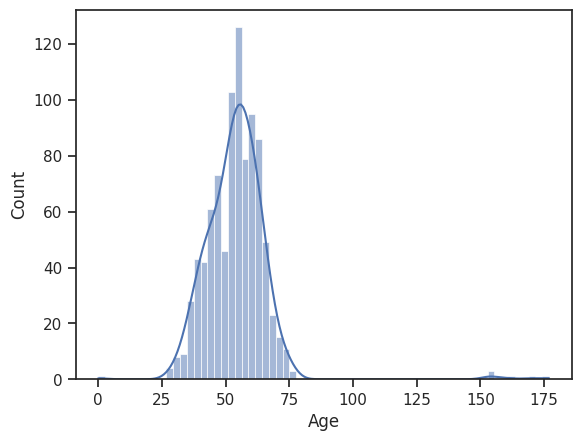

,Age
count,911.000000
mean,54.102086
std,12.988393
min,0.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,177.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='Age', kde=True)
plt.show()
heart[['Age']].describe()

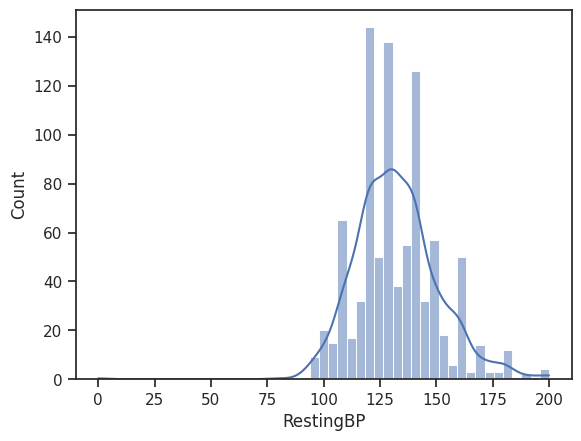

,RestingBP
count,918.000000
mean,132.396514
std,18.514154
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='RestingBP', kde=True)
plt.show()
heart[['RestingBP']].describe()

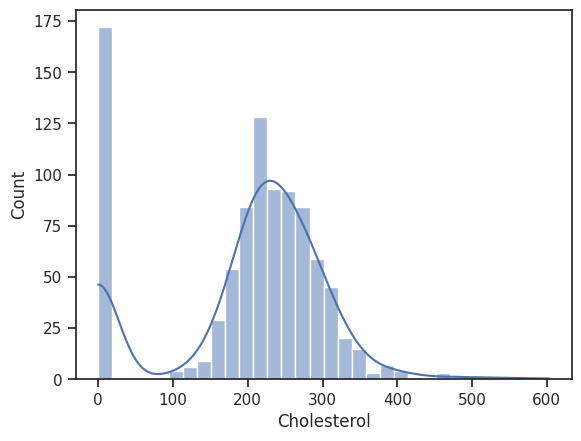

,Cholesterol
count,918.000000
mean,198.799564
std,109.384145
min,0.000000
25%,173.250000
50%,223.000000
75%,267.000000
max,603.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='Cholesterol', kde=True)
plt.show()
heart[['Cholesterol']].describe()

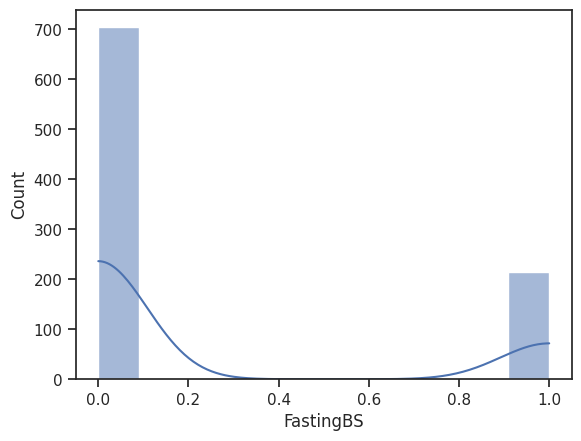

,FastingBS
count,918.000000
mean,0.233115
std,0.423046
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='FastingBS', kde=True)
plt.show()
heart[['FastingBS']].describe()

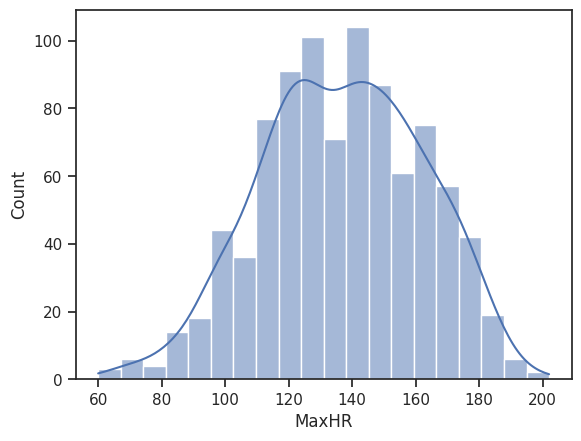

,MaxHR
count,918.000000
mean,136.809368
std,25.460334
min,60.000000
25%,120.000000
50%,138.000000
75%,156.000000
max,202.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='MaxHR', kde=True)
plt.show()
heart[['MaxHR']].describe()

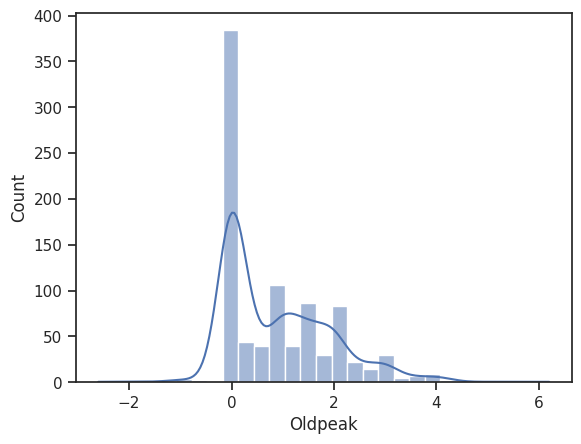

,Oldpeak
count,918.000000
mean,0.887364
std,1.066570
min,-2.600000
25%,0.000000
50%,0.600000
75%,1.500000
max,6.200000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='Oldpeak', kde=True)
plt.show()
heart[['Oldpeak']].describe()

In [ ]:
#cara menangani noise var numerik
heart = heart[heart['RestingBP'] != 0]

In [ ]:
#cara menangani noise var numerik
heart = heart[heart['Cholesterol'] != 0]

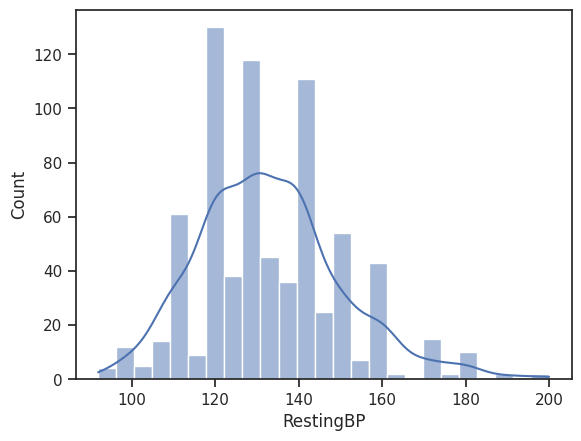

,RestingBP
count,746.000000
mean,133.022788
std,17.282750
min,92.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
#cek kembali
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='RestingBP', kde=True)
plt.show()
heart[['RestingBP']].describe()

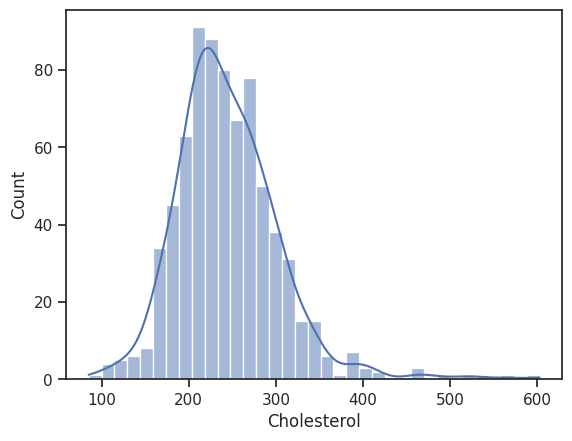

,Cholesterol
count,746.000000
mean,244.635389
std,59.153524
min,85.000000
25%,207.250000
50%,237.000000
75%,275.000000
max,603.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='Cholesterol', kde=True)
plt.show()
heart[['Cholesterol']].describe()

In [ ]:
#check jumlah baris stelah dihapus baris restingbp dan kolestrol
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,739.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,53.550744,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,13.042501,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**CHECK DUPLIKAT**

In [ ]:
# mengecek apakah ada duplikat data sangatlah mudah menggunakan Pandas
# Bayangkan jika menggunakan Excel.
print(heart.shape)
print("jumlah data yang duplikat", heart.duplicated().sum())
heart[heart.duplicated() == True].head()
# Perhatikan kalau sebelumnya kita tidak "Drop" var observasi,
# maka kita tidak akan mendapatkan duplikasi dengan cara ini.

(746, 12)
jumlah data yang duplikat 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


**CHECK OUTLIER**

In [ ]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'

    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'

        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center')
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

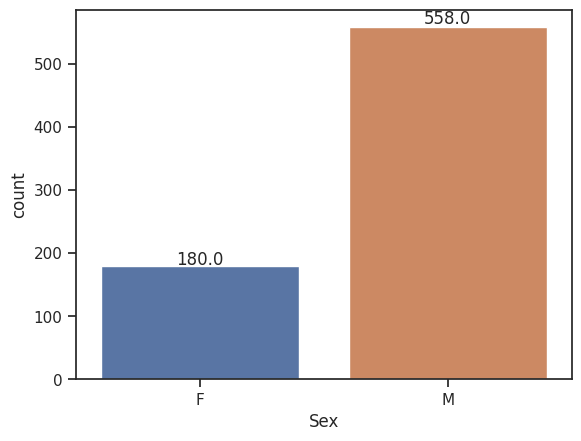

In [ ]:
#OUTLIER VAR KATEGORIK
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=heart, x='Sex')
vp_seaborn_show_values(ax)
plt.show()

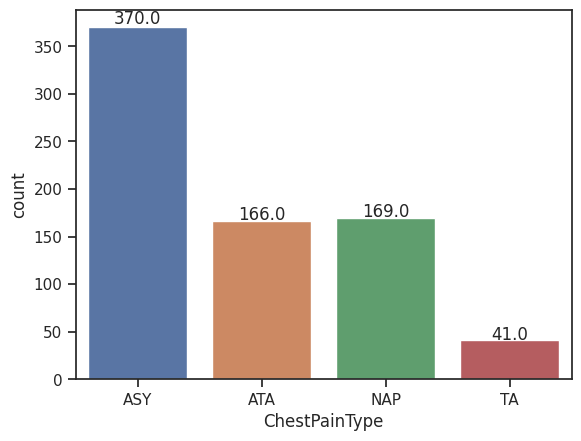

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=heart, x='ChestPainType')
vp_seaborn_show_values(ax)
plt.show()

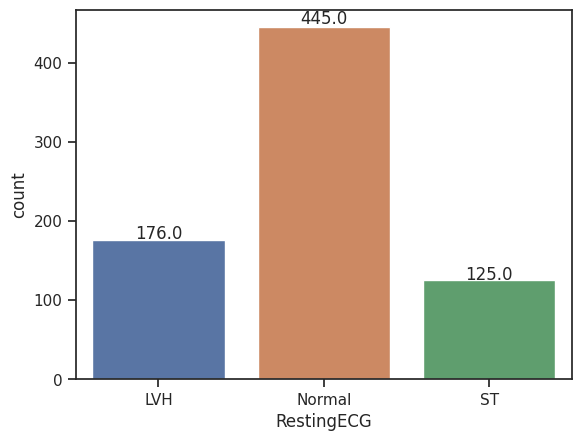

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=heart, x='RestingECG')
vp_seaborn_show_values(ax)
plt.show()

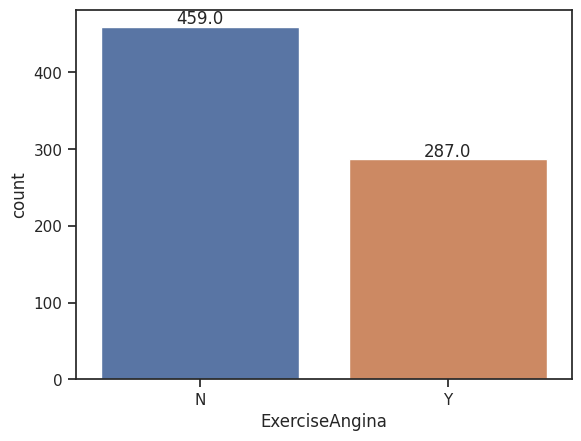

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=heart, x='ExerciseAngina')
vp_seaborn_show_values(ax)
plt.show()

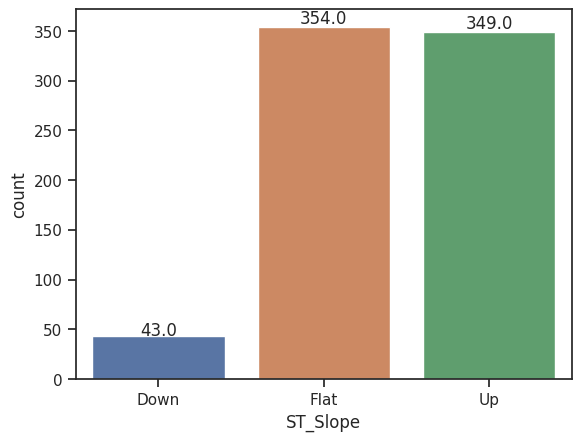

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=heart, x='ST_Slope')
vp_seaborn_show_values(ax)
plt.show()

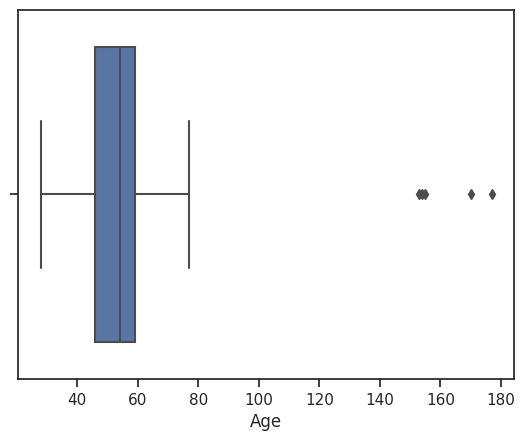

In [ ]:
#OUTLIER VAR NUMERIK
# Visual Python: Visualization > Seaborn
p = sns.boxplot(x="Age", data=heart)
plt.show()

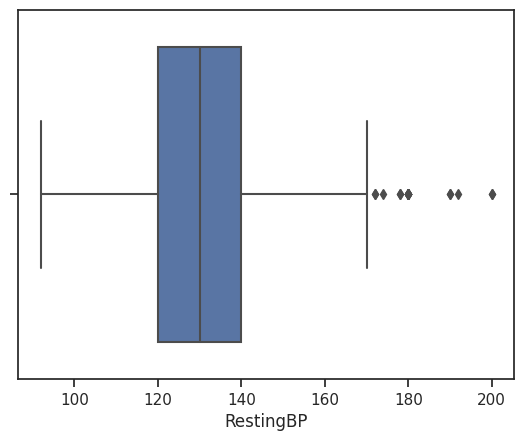

In [ ]:
p = sns.boxplot(x="RestingBP", data=heart)
plt.show()

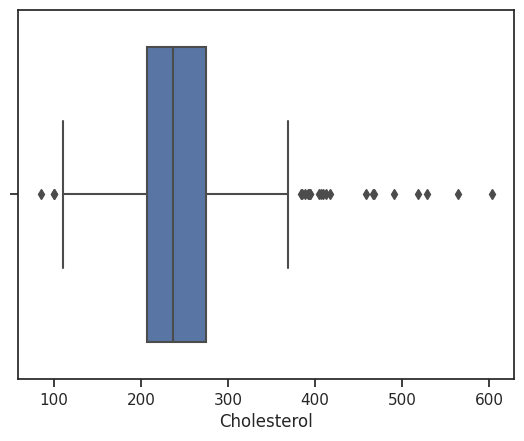

In [ ]:
p = sns.boxplot(x="Cholesterol", data=heart)
plt.show()

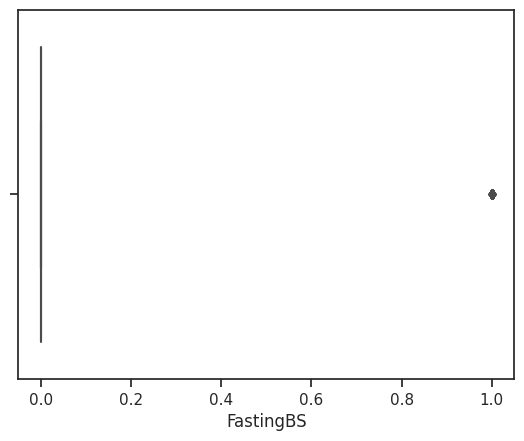

In [ ]:
p = sns.boxplot(x="FastingBS", data=heart)
plt.show()

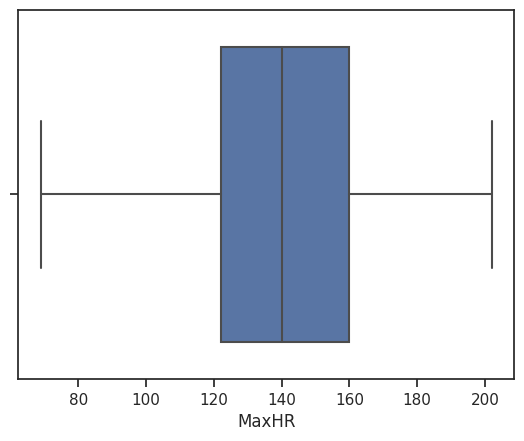

In [ ]:
p = sns.boxplot(x="MaxHR", data=heart)
plt.show()

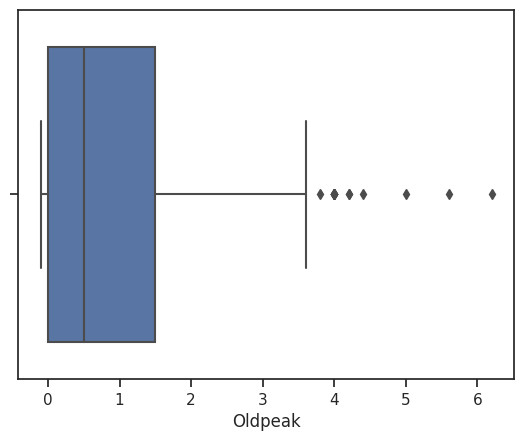

In [ ]:
p = sns.boxplot(x="Oldpeak", data=heart)
plt.show()

**CHECK MISSING VALUE**

In [ ]:
# General Look at the Missing Values
print(heart.isnull().sum())

Age               7
Sex               8
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
(heart.isnull().sum()/len(heart)*100).to_frame('persentase missing')

,persentase missing
Age,0.938338
Sex,1.072386
ChestPainType,0.000000
RestingBP,0.000000
Cholesterol,0.000000
FastingBS,0.000000
RestingECG,0.000000
MaxHR,0.000000
ExerciseAngina,0.000000
Oldpeak,0.000000


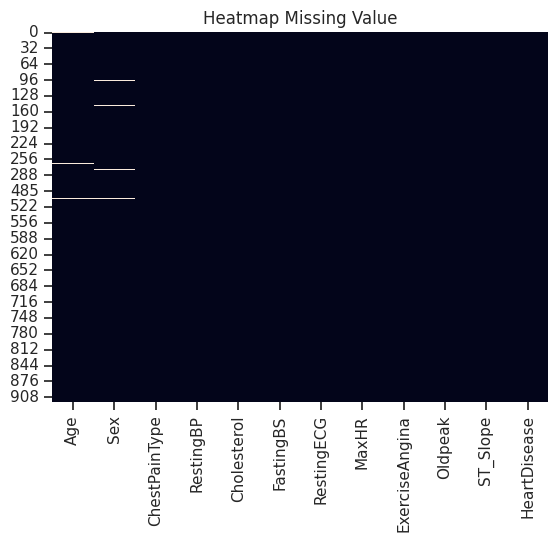

In [ ]:
sns.heatmap(heart.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
#mengatasi missing value var kategorik di sex
heart1 = heart.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
#df.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
#df.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
#df.dropna(subset=['Pekerjaan'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
print(heart.shape, heart1.shape)
heart1.head()

(746, 12) (732, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [ ]:
print(heart1.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


**`Transformasi Var Kategorik`**

In [ ]:
print(heart1.shape)
for col in catVar.columns:
    if col != 'HeartDisease':
        transformasi = pd.get_dummies(heart1[col], prefix='')
        heart1 = pd.concat([heart1, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            heart1.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(heart1.shape)
heart1.head()

(732, 12)
(732, 21)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,...,_NAP,_TA,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48.0,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54.0,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
5,39.0,120,339,0,170,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
# Saving the preprocessed Data for future use/analysis
heart1.to_csv("data/heart1_PreProcessed.csv", encoding='utf8', index=False)

**Pemodelan**

In [ ]:
# Loading Data Preprocessed (Belum Lengkap!)
file_ = 'data/heart1_PreProcessed.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    heart1 = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
    heart1 = pd.read_csv(file_)

N, P = heart1.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
heart1.head()

baris =  732 , Kolom (jumlah variabel) =  21


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,...,_NAP,_TA,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
0,49.0,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
1,37.0,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
2,48.0,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
3,54.0,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
4,39.0,120,339,0,170,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
predictor = heart1.loc[:, ~heart1.columns.isin(['HeartDisease'])]
target = heart1['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(512, 20) (512,)
(220, 20) (220,)


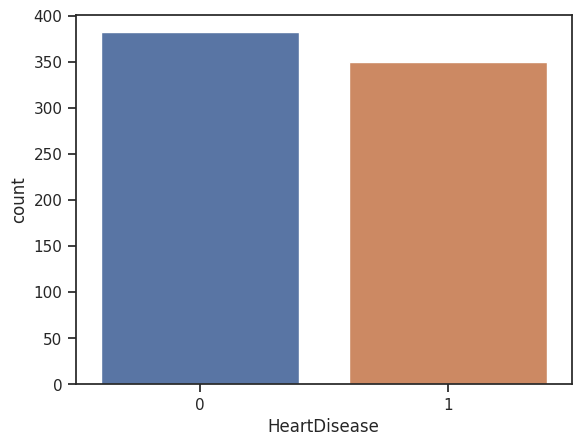

Counter({0: 382, 1: 350})
0 =  52.185792349726775 % 1 =  47.814207650273225 %


In [ ]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=heart1, x='HeartDisease')
plt.show()

D = Counter(heart1['HeartDisease'])
print(D)
print("0 = ", D[0]*100/(len(heart1['HeartDisease'])), '% 1 = ',D[1]*100/(len(heart1['HeartDisease'])) ,'%')

In [ ]:
!pip install graphviz

**Model Regresi Logistik**

In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[100  23]
 [ 12  85]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       123
           1       0.79      0.88      0.83        97

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.85      0.84      0.84       220



In [ ]:
#crossvalidation
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.86 (+/- 0.12), Waktu = 1.203 detik


RegLog    0.753425
dtype: float64

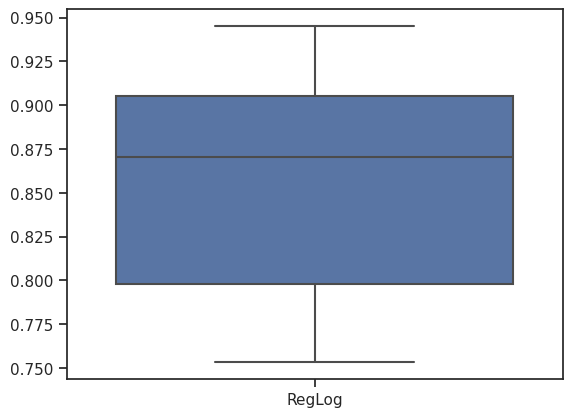

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
heart1_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = heart1_)
heart1_.min()

**Model Desicion Tree**

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[89 34]
 [17 80]]
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       123
           1       0.70      0.82      0.76        97

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.78      0.77      0.77       220



In [ ]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

array([0.08985595, 0.06279179, 0.06642477, 0.00755312, 0.09058296,
       0.02937066, 0.01855656, 0.01276217, 0.09982668, 0.00937629,
       0.00303861, 0.        , 0.0171917 , 0.01888846, 0.00167007,
       0.        , 0.01580078, 0.        , 0.00834735, 0.44796208])

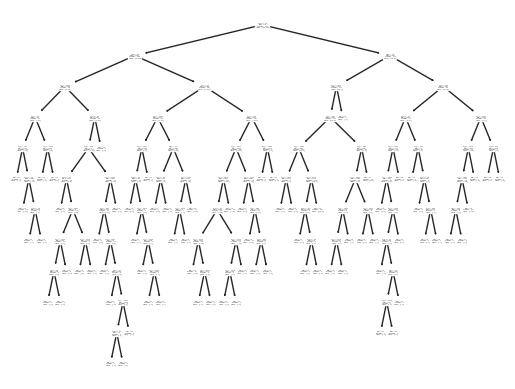

In [ ]:
# Warning cell ini butuh waktu Lama untuk selesai!...

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(xTrain, yTrain)
p = tree.plot_tree(clf)

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.79 (+/- 0.15), Waktu = 0.162 detik


RegLog     0.753425
DecTree    0.684932
dtype: float64

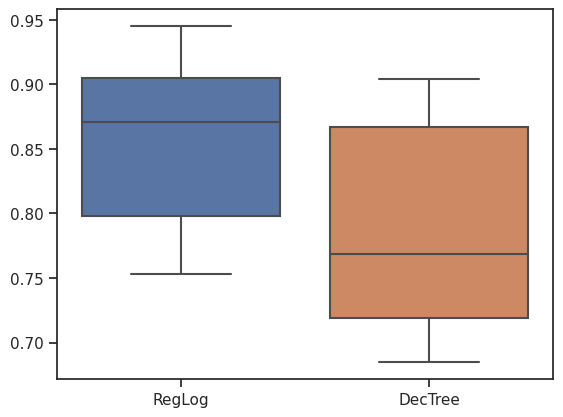

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
heart1_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = heart1_)
heart1_.min()

**Selesai**